# CICY4: Data Processing [5-fold-CV]

In this notebook, I create 5 separate datasets from the train set which is 80% of the dataset. The validation set is merged with the test set to form the remaining 20% of the data. 

In [2]:
import numpy as np
import pandas as pd
import os as os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import torch

In [3]:
seed = 42

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(seed)

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Load full, train, validation and test sets

In [5]:
hodge = np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge.npy')
direct = np.load('/kaggle/input/calabi-yau-cicy-4-folds/direct.npy')
hodge = hodge[~direct]

In [6]:
hodge.shape

(905684, 4)

In [7]:
h11 = hodge[:,0]
h21 = hodge[:,1]
h22 = hodge[:,3]
h31 = hodge[:,2]
h11max = np.max(hodge[:,0])
h11min = np.min(hodge[:,0])
print(f'Max h11: {h11max}, Min h11: {h11min} ')
h21max = np.max(hodge[:,1])
h21min = np.min(hodge[:,1])
print(f'Max h21: {h21max}, Min h21: {h21min} ')
h31max = np.max(hodge[:,2])
h31min = np.min(hodge[:,2])
print(f'Max h31: {h31max}, Min h31: {h31min} ')
h22max = np.max(hodge[:,3])
h22min = np.min(hodge[:,3])
print(f'Max h22: {h22max}, Min h22: {h22min} ')

Max h11: 24, Min h11: 1 
Max h21: 33, Min h21: 0 
Max h31: 426, Min h31: 20 
Max h22: 1752, Min h22: 204 


## Load train, valid, test sets:

In [8]:
#TRAIN SET-80pc
X_train_80 = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xtrain_80.npy')
y_train_80 = np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_ytrain_80.npy')

#VALIDATION SET-same
X_valid = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xvalid.npy')
y_valid = np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_yvalid.npy')

# TEST SET-12pc
X_test_80 = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xtest_80.npy')
y_test_80= np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_ytest_80.npy')

X_train_80.shape, X_valid.shape, X_test_80.shape, y_train_80.shape, y_valid.shape, y_test_80.shape

((724547, 16, 20),
 (72455, 16, 20),
 (108682, 16, 20),
 (724547, 4),
 (72455, 4),
 (108682, 4))

# Create 5 datasets from 5-fold CV

In [9]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=False)
cv_5fold = cv.split(X_train_80, y_train_80)
#The format of cv is [[train,val], [train,val], [train,val], ...]
list(enumerate(cv_5fold))

[(0,
  (array([144910, 144911, 144912, ..., 724544, 724545, 724546]),
   array([     0,      1,      2, ..., 144907, 144908, 144909]))),
 (1,
  (array([     0,      1,      2, ..., 724544, 724545, 724546]),
   array([144910, 144911, 144912, ..., 289817, 289818, 289819]))),
 (2,
  (array([     0,      1,      2, ..., 724544, 724545, 724546]),
   array([289820, 289821, 289822, ..., 434726, 434727, 434728]))),
 (3,
  (array([     0,      1,      2, ..., 724544, 724545, 724546]),
   array([434729, 434730, 434731, ..., 579635, 579636, 579637]))),
 (4,
  (array([     0,      1,      2, ..., 579635, 579636, 579637]),
   array([579638, 579639, 579640, ..., 724544, 724545, 724546])))]

In [10]:
len(list(cv.split(X_train_80, y_train_80))[0][0]), len(list(cv.split(X_train_80, y_train_80))[0][1])

(579637, 144910)

In [11]:
for i, (idx_train, idx_valid) in enumerate(cv.split(X_train_80, y_train_80)):
    Xs_train, ys_train = X_train_80[idx_train], y_train_80[idx_train]
    Xs_valid, ys_valid = X_train_80[idx_valid], y_train_80[idx_valid]
    np.save(f'fold_{i}_Xtrain', Xs_train)
    np.save(f'fold_{i}_Xval', Xs_valid)
    np.save(f'fold_{i}_yval', ys_valid)
    np.save(f'fold_{i}_ytrain', ys_train)


# Check the distributions of Hodge numbers 

## Fold-0

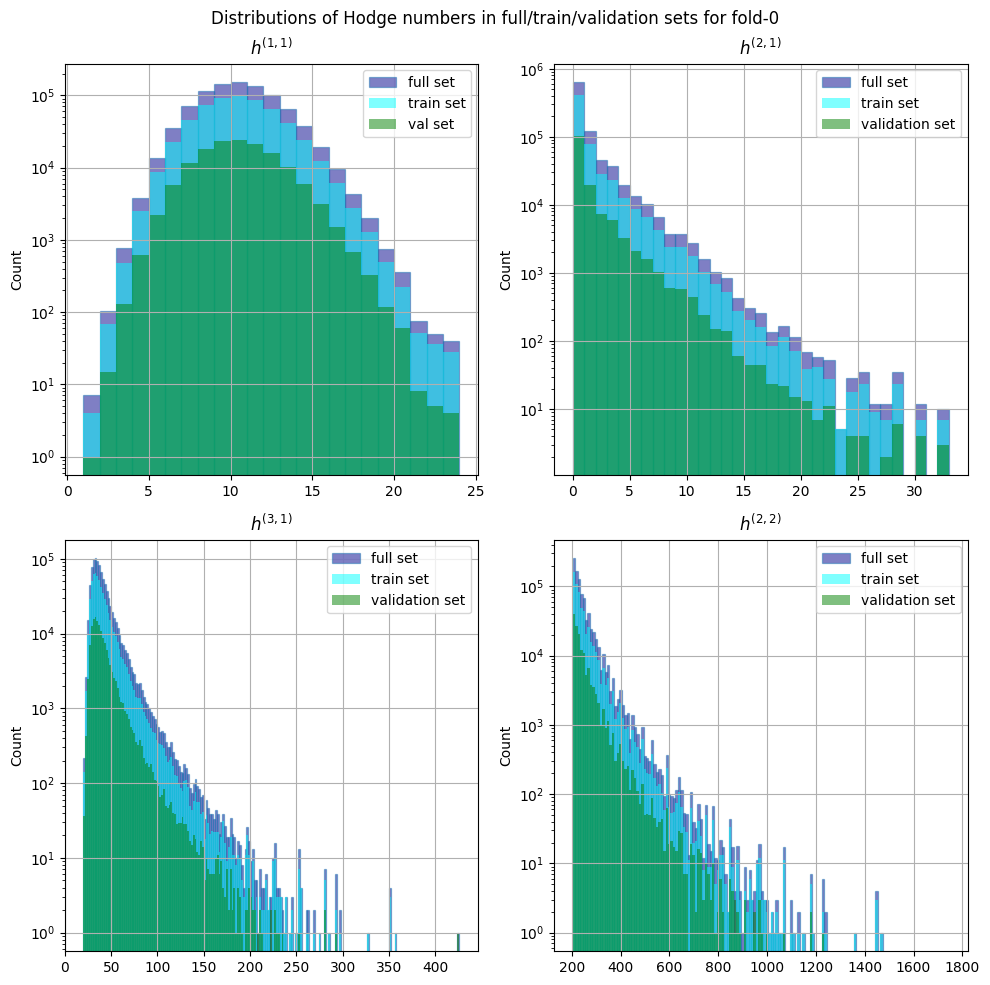

In [12]:
hodge_f0_t = np.load('/kaggle/working/fold_0_ytrain.npy')
hodge_f0_v = np.load('/kaggle/working/fold_0_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'green'}
style1 = {'facecolor': 'cyan'}
fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)

ax[0,0].hist(hodge[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'full set', **style)
ax[0,0].hist(hodge_f0_t[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train set', **style1)
ax[0,0].hist(hodge_f0_v [:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'val set', **style2)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_yscale('log')

ax[0,1].hist(hodge[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'full set', **style)
ax[0,1].hist(hodge_f0_t[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train set',**style1)
ax[0,1].hist(hodge_f0_v[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='validation set',**style2)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(hodge[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='full set', **style)
ax[1,0].hist(hodge_f0_t[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train set',**style1)
ax[1,0].hist(hodge_f0_v[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='validation set',**style2)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(hodge[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'full set', **style)
ax[1,1].hist(hodge_f0_t[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train set',**style1)
ax[1,1].hist(hodge_f0_v[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'validation set', **style2)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.suptitle('Distributions of Hodge numbers in full/train/validation sets for fold-0')
plt.savefig('Hodge_numbers_distributions_fold0')

## Fold-1

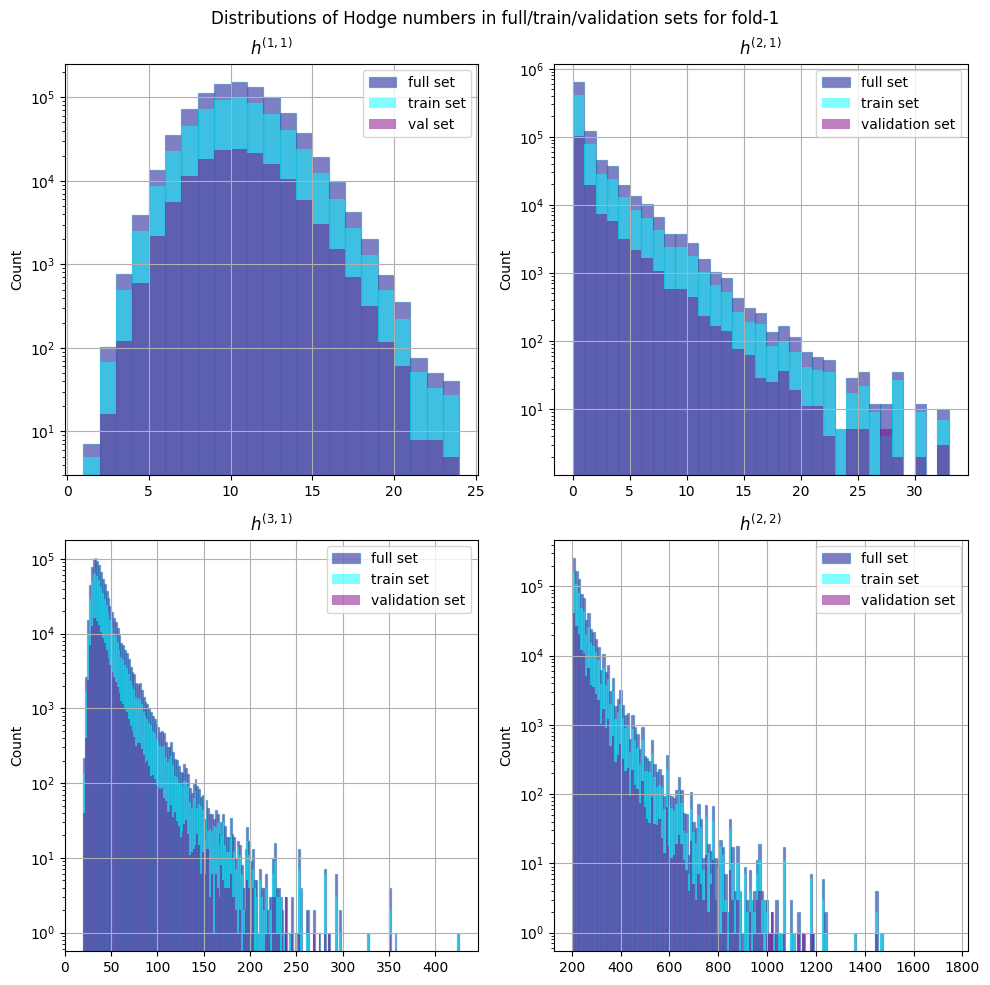

In [16]:
hodge_f1_t = np.load('/kaggle/working/fold_1_ytrain.npy')
hodge_f1_v = np.load('/kaggle/working/fold_1_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'purple'}
style1 = {'facecolor': 'cyan'}
fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)

ax[0,0].hist(hodge[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'full set', **style)
ax[0,0].hist(hodge_f1_t[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train set', **style1)
ax[0,0].hist(hodge_f1_v [:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'val set', **style2)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_yscale('log')

ax[0,1].hist(hodge[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'full set', **style)
ax[0,1].hist(hodge_f1_t[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train set',**style1)
ax[0,1].hist(hodge_f1_v[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='validation set',**style2)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(hodge[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='full set', **style)
ax[1,0].hist(hodge_f1_t[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train set',**style1)
ax[1,0].hist(hodge_f1_v[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='validation set',**style2)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(hodge[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'full set', **style)
ax[1,1].hist(hodge_f1_t[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train set',**style1)
ax[1,1].hist(hodge_f1_v[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'validation set', **style2)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.suptitle('Distributions of Hodge numbers in full/train/validation sets for fold-1')
plt.savefig('Hodge_numbers_distributions_fold1')

## Fold-2

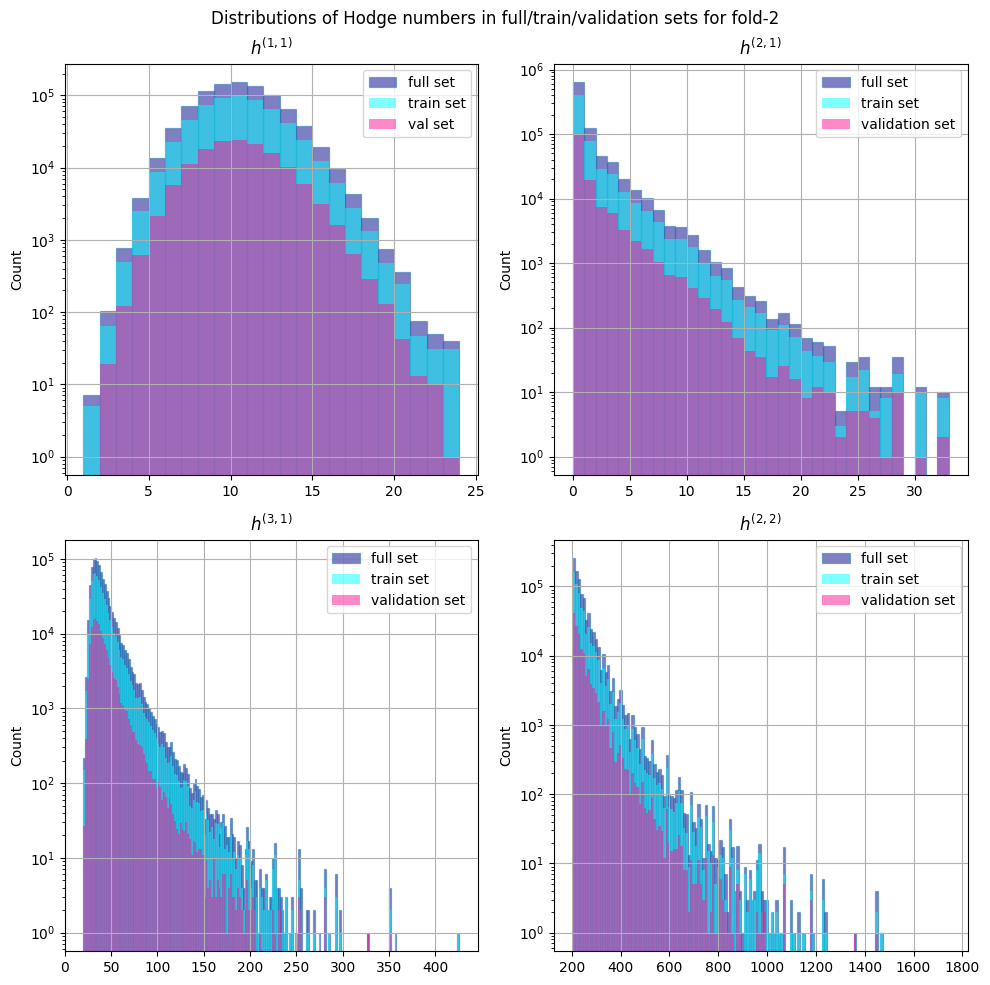

In [13]:
hodge_f2_t = np.load('/kaggle/working/fold_2_ytrain.npy')
hodge_f2_v = np.load('/kaggle/working/fold_2_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'deeppink'}
style1 = {'facecolor': 'cyan'}

fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)

ax[0,0].hist(hodge[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'full set', **style)
ax[0,0].hist(hodge_f2_t[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train set', **style1)
ax[0,0].hist(hodge_f2_v [:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'val set', **style2)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_yscale('log')

ax[0,1].hist(hodge[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'full set', **style)
ax[0,1].hist(hodge_f2_t[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train set',**style1)
ax[0,1].hist(hodge_f2_v[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='validation set',**style2)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(hodge[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='full set', **style)
ax[1,0].hist(hodge_f2_t[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train set',**style1)
ax[1,0].hist(hodge_f2_v[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='validation set',**style2)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(hodge[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'full set', **style)
ax[1,1].hist(hodge_f2_t[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train set',**style1)
ax[1,1].hist(hodge_f2_v[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'validation set', **style2)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.suptitle('Distributions of Hodge numbers in full/train/validation sets for fold-2')
plt.savefig('Hodge_numbers_distributions_fold2')

## Fold-3

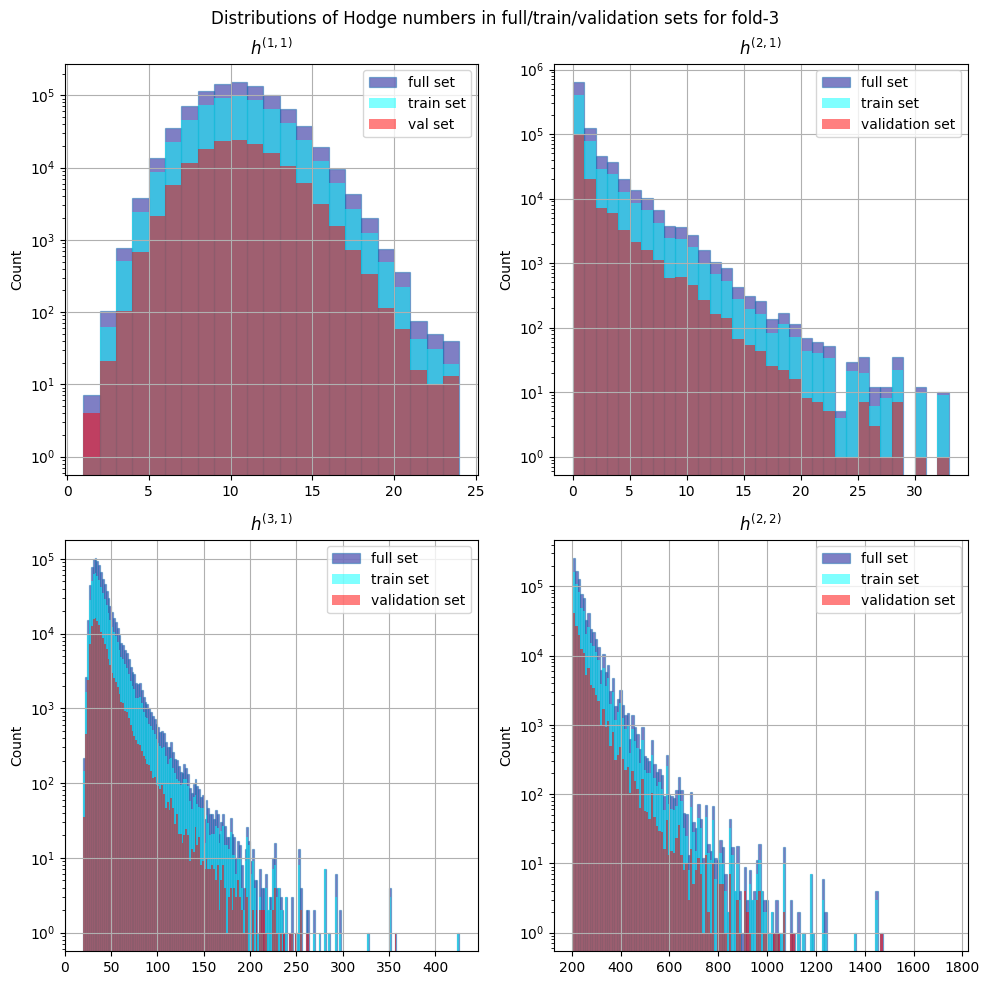

In [14]:
hodge_f3_t = np.load('/kaggle/working/fold_3_ytrain.npy')
hodge_f3_v = np.load('/kaggle/working/fold_3_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'red'}
style1 = {'facecolor': 'cyan'}
fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)

ax[0,0].hist(hodge[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'full set', **style)
ax[0,0].hist(hodge_f3_t[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train set', **style1)
ax[0,0].hist(hodge_f3_v [:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'val set', **style2)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_yscale('log')

ax[0,1].hist(hodge[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'full set', **style)
ax[0,1].hist(hodge_f3_t[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train set',**style1)
ax[0,1].hist(hodge_f3_v[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='validation set',**style2)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(hodge[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='full set', **style)
ax[1,0].hist(hodge_f3_t[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train set',**style1)
ax[1,0].hist(hodge_f3_v[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='validation set',**style2)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(hodge[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'full set', **style)
ax[1,1].hist(hodge_f3_t[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train set',**style1)
ax[1,1].hist(hodge_f3_v[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'validation set', **style2)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.suptitle('Distributions of Hodge numbers in full/train/validation sets for fold-3')
plt.savefig('Hodge_numbers_distributions_fold3')

## Fold-4

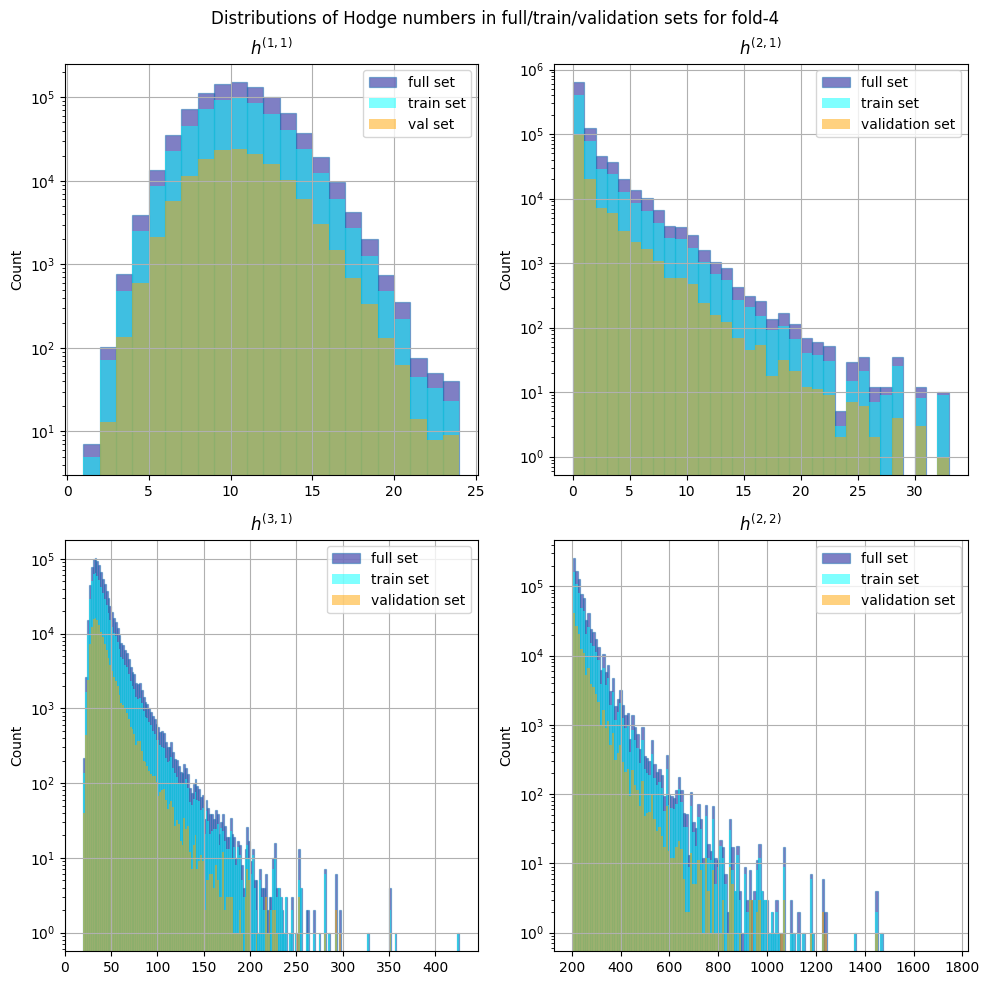

In [15]:
hodge_f4_t = np.load('/kaggle/working/fold_4_ytrain.npy')
hodge_f4_v = np.load('/kaggle/working/fold_4_yval.npy')

style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style2 = {'facecolor': 'orange'}
style1 = {'facecolor': 'cyan'}
fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)

ax[0,0].hist(hodge[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'full set', **style)
ax[0,0].hist(hodge_f4_t[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train set', **style1)
ax[0,0].hist(hodge_f4_v [:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'val set', **style2)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_yscale('log')

ax[0,1].hist(hodge[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'full set', **style)
ax[0,1].hist(hodge_f4_t[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train set',**style1)
ax[0,1].hist(hodge_f4_v[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='validation set',**style2)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(hodge[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='full set', **style)
ax[1,0].hist(hodge_f4_t[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train set',**style1)
ax[1,0].hist(hodge_f4_v[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='validation set',**style2)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(hodge[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'full set', **style)
ax[1,1].hist(hodge_f4_t[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train set',**style1)
ax[1,1].hist(hodge_f4_v[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'validation set', **style2)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.suptitle('Distributions of Hodge numbers in full/train/validation sets for fold-4')
plt.savefig('Hodge_numbers_distributions_fold4')